<a href="https://colab.research.google.com/github/Aurelien07/Ghost-Goblins-Ghouls/blob/main/goblins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection of Monsters :

In [ ]:
! pip install wefe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.6 MB/s eta 0:00:00


### Import library

In [ ]:
# for basic stuff in python
import pandas as pd
import numpy as np

# for vizualisation : 
import matplotlib.pyplot as plt
import seaborn as sns

# for scoring : 
import wefe 

# for prediction :

# against warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

"""# for zip files :
from zipfile import ZipFile """

# for prediction :
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/goblins.ipynb
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/test.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/sample_submission.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/train.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model.log
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model/keras_metadata.pb
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model/saved_model.pb
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model/variables/variables.index
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model/variables/variables.data-00000-of-00001


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/train.csv.zip")

# Vizualisation of Dataset :

In [ ]:
display(df.head())
print('')
print('') # give a bit space between head and describe
display(df.describe().T)
print('')
print('') # give a bit space between head and describe
display(df.dtypes)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


,count,mean,std,min,25%,50%,75%,max
id,371.0,443.676550,263.222489,0.000000,205.500000,458.000000,678.500000,897.000000
bone_length,371.0,0.434160,0.132833,0.061032,0.340006,0.434891,0.517223,0.817001
rotting_flesh,371.0,0.506848,0.146358,0.095687,0.414812,0.501552,0.603977,0.932466
hair_length,371.0,0.529114,0.169902,0.134600,0.407428,0.538642,0.647244,1.000000
has_soul,371.0,0.471392,0.176129,0.009402,0.348002,0.466372,0.600610,0.935721


id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object

We don't really need id here because it will be like our index.

In [ ]:
df = df.iloc[:,1:] # dont keep 1st column (id)

In [ ]:
categorical_ft = df.select_dtypes(exclude=['float64'])
numerical_ft = df.select_dtypes(exclude=['object'])

In [ ]:
def unique_raw(data: pd.DataFrame):

    print('-'*100)
    print(" "*41, '\033[1m' + "Données uniques :"+'\033[0m')  # Describe
    print('-'*100)

    dico = {}  # on crée un dictionnaire de données
    for col in data.columns:
      print('')
      print('-'*14)
      print(f"Column: {col}")
      print('-'*14)
      print('')
      print(data[col].unique())

In [ ]:
unique_raw(categorical_ft)

----------------------------------------------------------------------------------------------------
                                          Données uniques :
----------------------------------------------------------------------------------------------------

--------------
Column: color
--------------

['clear' 'green' 'black' 'white' 'blue' 'blood']

--------------
Column: type
--------------

['Ghoul' 'Goblin' 'Ghost']


As we can see, we have 3 types of monsters and 6 differents colors.

Now let's see the proportion of monsters and the color between them.

### Proportion of monsters and colors :

In [ ]:
pd.crosstab(df["type"],df["color"])

color,black,blood,blue,clear,green,white
type,,,,,,
Ghost,14,6,6,32,15,44
Ghoul,14,4,6,42,13,50
Goblin,13,2,7,46,14,43


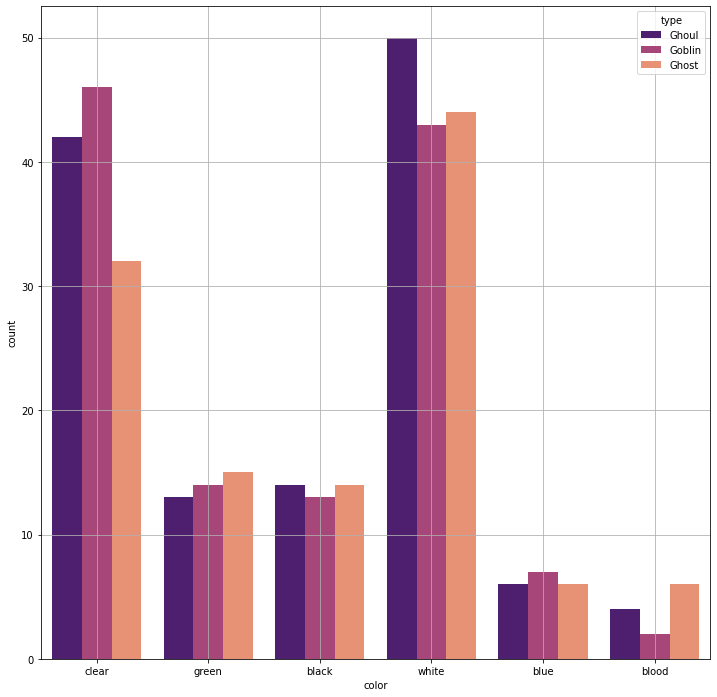

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='color', hue='type', data=df,palette='magma')
plt.grid(True)
plt.show()

As we can see it's pretty equal.

#### Correlation : 

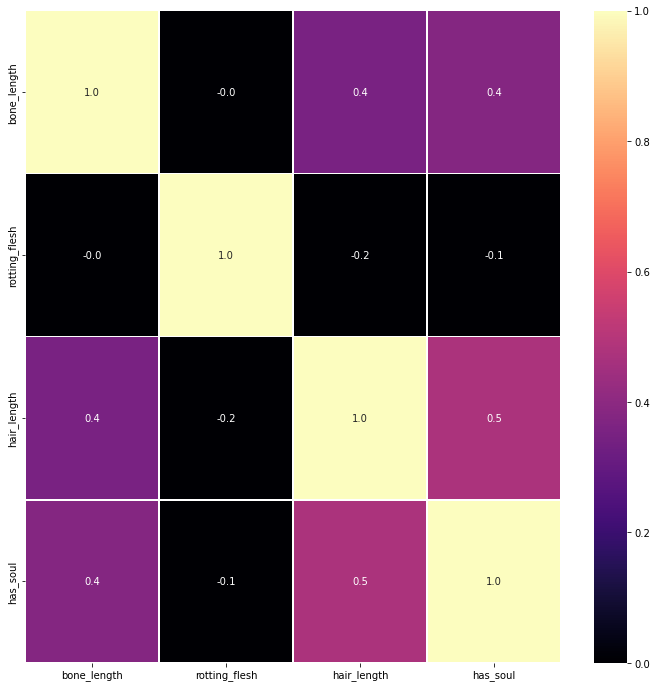

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5, vmin=0, vmax=1, cmap="magma")

#### Pairplot :

<Figure size 864x864 with 0 Axes>

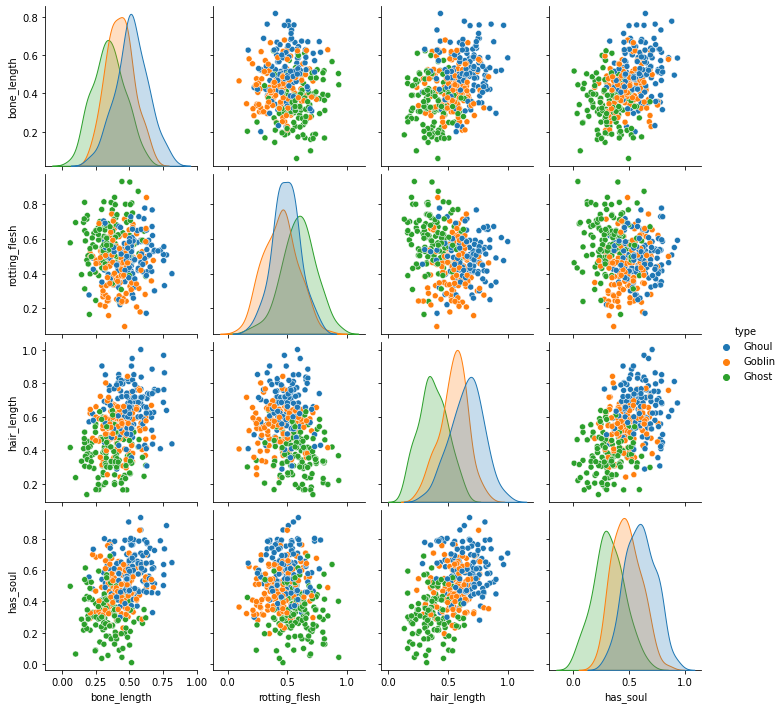

In [ ]:
plt.figure(figsize=(12,12))
sns.pairplot(df, hue = 'type')

## let's one hot encoder :

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# for encoding :
encoder = OneHotEncoder()

# choose columns to ohe :
df_ohe = encoder.fit_transform(df[['color']])

# create a dataframe :
data_encoded = pd.DataFrame(df_ohe.toarray(), columns=encoder.get_feature_names_out())

display(data_encoded)

,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
366,0.0,0.0,1.0,0.0,0.0,0.0
367,0.0,0.0,0.0,0.0,1.0,0.0
368,0.0,0.0,0.0,1.0,0.0,0.0
369,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lo=LabelEncoder() # to put numbers for type
df["type"]=  lo.fit_transform(df["type"])

In [ ]:
data = pd.concat([data_encoded, df],axis = 1)
data = data.drop(columns=['color'])

In [ ]:
data

,color_black,color_blood,color_blue,color_clear,color_green,color_white,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.0,0.0,0.0,1.0,0.0,0.0,0.354512,0.350839,0.465761,0.781142,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.575560,0.425868,0.531401,0.439899,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.467875,0.354330,0.811616,0.791225,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.776652,0.508723,0.636766,0.884464,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.566117,0.875862,0.418594,0.636438,0
...,...,...,...,...,...,...,...,...,...,...,...
366,0.0,0.0,1.0,0.0,0.0,0.0,0.458132,0.391760,0.660590,0.635689,2
367,0.0,0.0,0.0,0.0,1.0,0.0,0.331936,0.564836,0.539216,0.551471,0
368,0.0,0.0,0.0,1.0,0.0,0.0,0.481640,0.501147,0.496446,0.544003,1
369,0.0,0.0,0.0,1.0,0.0,0.0,0.294943,0.771286,0.583503,0.300618,0


let's check now the correlation.

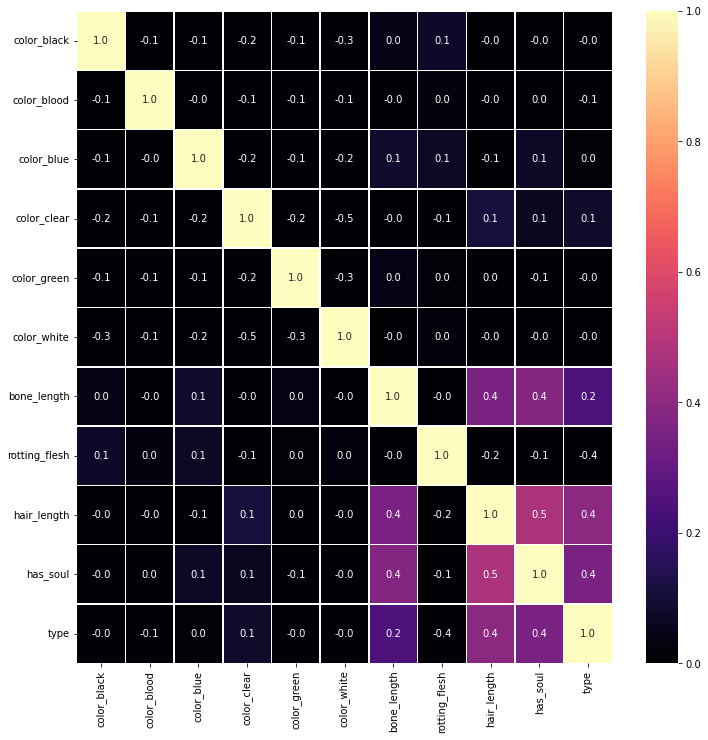

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, vmin=0, vmax=1, cmap="magma")

# let's try to predict :

In [ ]:
X = data.drop(["type"],axis=1)
y = pd.get_dummies(data['type'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(296, 10) (296, 3)
(75, 10) (75, 3)


## C.N.N :

In [ ]:
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Dense(96,input_shape=(X.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(384,activation='relu'))
model.add(Dense(384,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1056      
                                                                 
 dense_1 (Dense)             (None, 256)               24832     
                                                                 
 dense_2 (Dense)             (None, 384)               98688     
                                                                 
 dense_3 (Dense)             (None, 384)               147840    
                                                                 
 dense_4 (Dense)             (None, 256)               98560     
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 371,747
Trainable params: 371,747
Non-trai

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model"):

  epochs= 20 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
    filename= "/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model.log",
    separator = ",",
    append = False
    )


  history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model')
  print('The Model has already been saved')

The Model has already been saved
CPU times: user 616 ms, sys: 31.6 ms, total: 648 ms
Wall time: 1.84 s


CPU times: user 1.86 s, sys: 506 ms, total: 2.37 s
Wall time: 2.62 s


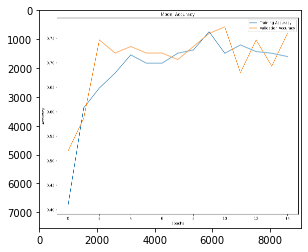

In [ ]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg'))

CPU times: user 1.67 s, sys: 434 ms, total: 2.1 s
Wall time: 2.35 s


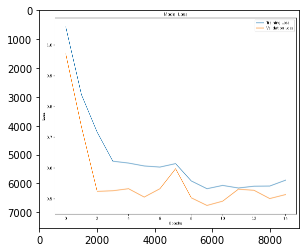

In [ ]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg'))

As we can see our prediction are " OK ", but i think we can have better score with regression algorithm.

### Pipeline :

In [ ]:
X = data.drop(["type"],axis=1)
y = data['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Instancier les algorithmes de classification
log_reg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
gb = GradientBoostingClassifier()
adab = AdaBoostClassifier()

# Définir les étapes de la pipeline
steps = [('scaler', StandardScaler()),
         ('classifiers', VotingClassifier(estimators=[('lr', log_reg), ('rf', rf), ('knn', knn), ('dt', dt), ('xgb', xgb), ('gb', gb), ('adab', adab)], voting='hard'))]

# Créer la pipeline
pipeline = Pipeline(steps)

# Définir les paramètres à tester pour la recherche de grille
param_grid = {'classifiers__weights': [None, [1,1,1,1,1,1,1]],
              'classifiers__lr__C': [0.1, 1, 10],
              'classifiers__rf__n_estimators': [10, 50, 100],
              'classifiers__knn__n_neighbors': [3, 5, 7],
              'classifiers__dt__max_depth': [3, 5, 7],
              'classifiers__xgb__n_estimators': [10, 50, 100],
              'classifiers__gb__n_estimators': [10, 50, 100],
              'classifiers__adab__n_estimators': [10, 50, 100]}

# Créer la recherche de grille
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Appliquer la recherche de grille aux données
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifiers',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression()),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('knn',
                                                                      KNeighborsClassifier()),
                                                                     ('dt',
                                                                      DecisionTreeClassifier()),
                                                                     ('xgb',
                                                                      XGBClassifier()),
     

### Save the model with pickle :

In [ ]:
import pickle

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model.pkl'):

# Train the model :
best_model = grid_search.best_estimator_

# Save the model :
with open('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model.pkl', 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

else :
  
# load the model :
with open('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model.pkl', 'rb') as handle:
    best_model = pickle.load(handle)

IndentationError: ignored